boston house pricing prediction

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [9]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
dataset = pd.read_csv(data_url)

In [10]:
type(dataset)

pandas.core.frame.DataFrame

In [11]:
dataset.rename(columns={'medv': 'price'}, inplace=True)

In [12]:
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
target = dataset['price']

In [14]:
# dividing the dataset into independent and dependent features
# independent: all cols till lstat
x = dataset.iloc[:,:-1]
# dependent: price
y = dataset.iloc[:,-1]

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.model_selection import cross_val_score
# cross_val_score is a "Reality Check" for your machine learning model.
# Instead of testing your model just once, it tests it multiple times on different parts of your data to make sure the results are consistent and not just a lucky guess.
# it considers different combinations of train and test data.

In [17]:
l_reg = LinearRegression()

In [18]:
mse = cross_val_score(l_reg, x, y, scoring = 'neg_mean_squared_error', cv = 5)
# cv = 5: tells py, split the data into 5 different tests.
# Scoring = The method used to measure performance.
# neg_mean_squared_error is a way to measure how "wrong" your model's guesses are, but written as a negative number.
# the rule is: The closer to zero, the better.
print(mse)
mean_mse = np.mean(mse)
mean_mse

[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]


np.float64(-37.13180746769923)

In [19]:
# Train the model on the full data
l_reg.fit(x, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
# giving it the first row of data to see what it guesses
prediction = l_reg.predict(x.iloc[0:1])
print(f"Model Guess: {prediction}")
print(f"Actual price {y[0]}")

Model Guess: [30.00384338]
Actual price 24.0


In [22]:
# 2nd row of data
prediction2 = l_reg.predict(x.iloc[1:2])
print(f"Model Guess: {prediction2}")
print(f"Actual price {y[1]}")

Model Guess: [25.02556238]
Actual price 21.6


ridge regression

In [23]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
ridge_reg = Ridge()

In [ ]:
params = {'alpha': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# Alpha controls how strong the regularization is.
# (Regularization = penalty to stop overfitting)
# Loss = Error + alpha × Penalty

In [28]:
# GridSearchCV to find best alpha using 5-fold CV
# neg_mean_squared_error because sklearn maximizes score.(we want to minimize mse)
ridge_cv = GridSearchCV(
    estimator = ridge_reg, 
    param_grid = params, 
    scoring = 'neg_mean_squared_error', 
    cv = 5
)

In [ ]:
ridge_cv.fit(X_train, y_train)   

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Ridge()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': [1, 10, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter in

In [ ]:
print(ridge_cv.best_params_)  

{'alpha': 1}


In [ ]:
print(ridge_cv.best_score_)    # best mse

-23.96555607592505


In [32]:
ridge_pred = ridge_cv.predict(X_test)

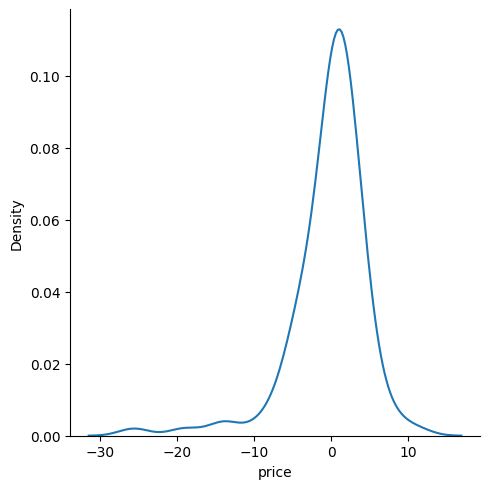

In [ ]:
import seaborn as sns
sns.displot(ridge_pred-y_test, kind = 'kde')

# peak is near 0. model is unbiased on average.
# left tail is more. this means pred<actual. model underpredicts for some cases.
# this shows it is actually a good model.

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
score = r2_score(y_test, ridge_pred)
print(f"R^2 Score: {score}")  
# variance in house prices is 66.62% explained by the model. 
# the model is moderately good.

R^2 Score: 0.6662221670168522


In [ ]:
print(f"Mean absolute error: {round(mean_absolute_error(y_test, ridge_pred), 2)}")

# On average, house price predictions are off by 3.13
# Predictions are quite accurate 

Mean absolute error: 3.13


In [40]:
mse = mean_squared_error(y_test, ridge_pred)
print(f"Mean squared error: {round(mse, 2)}")

Mean squared error: 24.48


In [41]:
print("Root mean squared error (RMSE):", mse**0.5)

Root mean squared error (RMSE): 4.9474428978724605


lasso regression

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lasso = Lasso()

In [45]:
params = {'alpha': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
lasso_cv = GridSearchCV(
    estimator = lasso,  
    param_grid = params, 
    scoring = 'neg_mean_squared_error',
    cv = 5
)   
lasso_cv.fit(X_train, y_train)
print(lasso_cv.best_params_)  
print(lasso_cv.best_score_)    # best mse   

{'alpha': 1}
-28.13462403557164


In [47]:
lasso_pred = lasso_cv.predict(X_test)

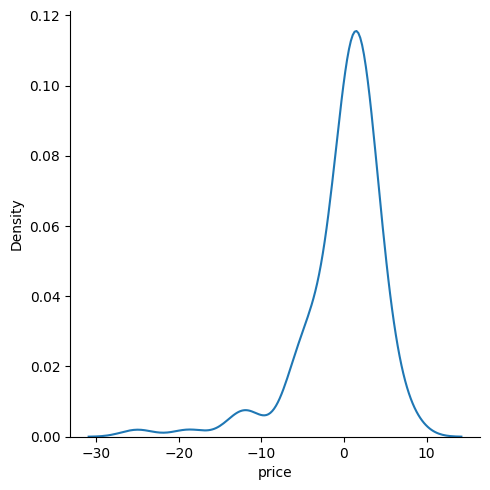

In [ ]:
import seaborn as sns
sns.displot(lasso_pred-y_test, kind = 'kde')
# peak is near 0. model is unbiased on average.
# left tail is more. this means pred<actual. model underpredicts for some cases

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
score = r2_score(y_test, lasso_pred)
print(f"R^2 Score: {score}")  
# variance in house prices is 66.71% explained by the model. 
# the model is moderately good.
# Lasso slightly better than Ridge

R^2 Score: 0.6671453631686304


In [ ]:
print(f"Mean absolute error: {round(mean_absolute_error(y_test, lasso_pred), 2)}")

# On average, house price predictions are off by 3.25
# Predictions are quite accurate 
# Lasso slightly worse than Ridge in terms of MAE

Mean absolute error: 3.25


In [56]:
mse_lasso = mean_squared_error(y_test, lasso_pred)
print(f"Mean squared error: {round(mse_lasso, 2)}")

Mean squared error: 24.41


In [58]:
print("Root mean squared error (RMSE):", mse_lasso**0.5)

Root mean squared error (RMSE): 4.94059609372186
